In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_csv("data/cleaned_v1_data.csv")

In [67]:
df.duplicated().sum()

2104

In [68]:
df = df.drop_duplicates()

In [69]:
features = []
stones = []
luminosity = []
regular_col = []

for col in df.columns:
    if 'feature' in col:
        features.append(col)
    elif 'luminosity' in col:
        luminosity.append(col)
    elif 'precious_stone' in col:
        stones.append(col)
    else:
        regular_col.append(col)

In [70]:
df[regular_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3645 entries, 0 to 4755
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  3645 non-null   int64  
 1   Brand                  3645 non-null   object 
 2   Movement               3638 non-null   object 
 3   Case Size              3645 non-null   float64
 4   Case Thickness         2512 non-null   float64
 5   Case Shape             3645 non-null   object 
 6   Case Material          3645 non-null   object 
 7   Glass Material         3645 non-null   object 
 8   Hands                  1757 non-null   object 
 9   Indexes                1726 non-null   object 
 10  Strap Material         3645 non-null   object 
 11  Clasp Type             3645 non-null   object 
 12  Gender                 3645 non-null   object 
 13  Water Resistance (M)   3640 non-null   float64
 14  Warranty Period        3645 non-null   float64
 15  Country o

In [71]:
df[regular_col].isnull().sum()

price                       0
Brand                       0
Movement                    7
Case Size                   0
Case Thickness           1133
Case Shape                  0
Case Material               0
Glass Material              0
Hands                    1888
Indexes                  1919
Strap Material              0
Clasp Type                  0
Gender                      0
Water Resistance (M)        5
Warranty Period             0
Country of Origin           0
Display                  1034
Power Reserve            1314
Jewels                      0
Interchangeable Strap       0
Bezel                       0
Limited Edition             0
Frequency (bph)          1613
Case Material Coating    3048
dtype: int64

In [72]:
df[regular_col].describe()

,price,Case Size,Case Thickness,Water Resistance (M),Warranty Period,Power Reserve,Jewels,Interchangeable Strap,Limited Edition,Frequency (bph)
count,3.645000e+03,3645.000000,2512.000000,3640.000000,3645.000000,2331.000000,3645.000000,3645.000000,3645.000000,2032.000000
mean,7.646446e+05,39.530807,12.031037,122.373626,2.892181,126.162162,15.815638,0.105624,0.085597,27840.216535
std,1.787492e+06,4.707938,18.278038,252.006999,1.343218,1362.444995,14.874467,0.307398,0.279806,2894.369555
min,1.425000e+04,20.700000,4.200000,10.000000,2.000000,36.000000,0.000000,0.000000,0.000000,18000.000000
25%,1.219000e+05,38.000000,10.100000,50.000000,2.000000,41.000000,0.000000,0.000000,0.000000,28800.000000
50%,2.860000e+05,41.000000,11.800000,100.000000,2.000000,48.000000,22.000000,0.000000,0.000000,28800.000000
75%,7.130000e+05,42.200000,13.300000,100.000000,5.000000,70.000000,26.000000,0.000000,0.000000,28800.000000
max,3.900000e+07,49.400000,920.000000,6000.000000,5.000000,30000.000000,68.000000,1.000000,1.000000,36000.000000


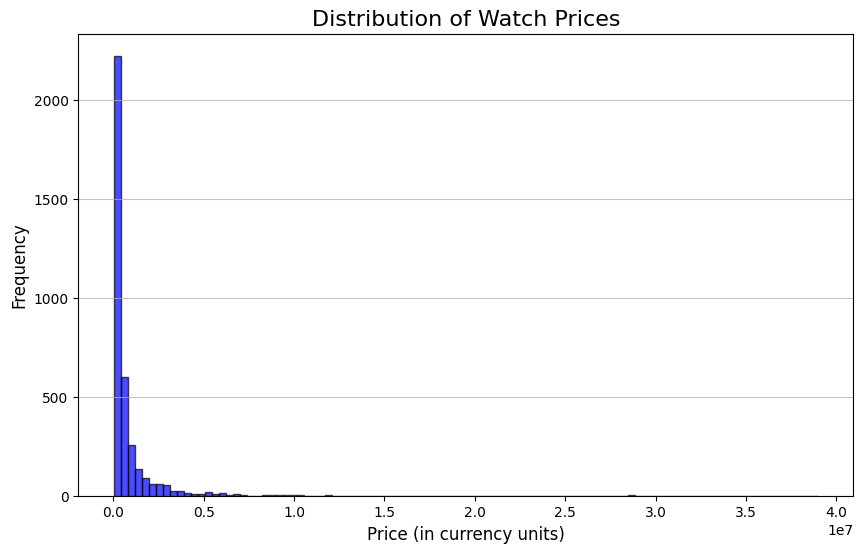

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Watch Prices', fontsize=16)
plt.xlabel('Price (in currency units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

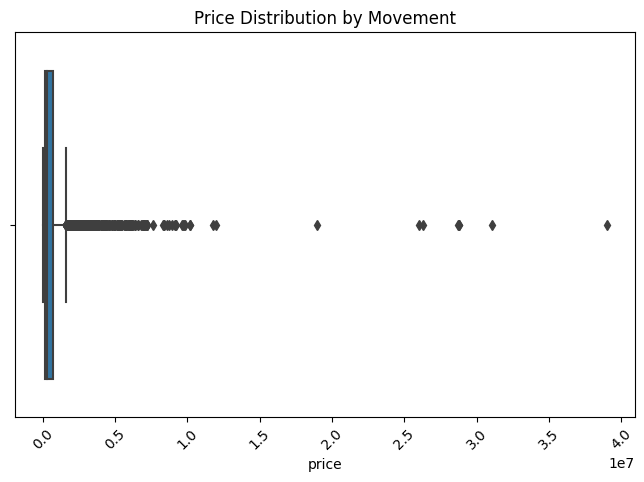

In [74]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='price')
plt.title('Price Distribution by Movement', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [75]:
(df['price'] > 15000000).sum()

8

In [76]:
df = df[(df['price'] < 15000000)]

Outliers exist. We can drop rows with prices more than 1.5cr.

In [77]:
from scipy.stats import f_oneway

def anova(col):
    temp_df = df.dropna(subset=[col])
    categories = [temp_df[temp_df[col] == cat]['price'] for cat in temp_df[col].unique()]
    stat, p_value = f_oneway(*categories)

    print(f"ANOVA F-statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"There is a significant impact of {col} on prices")
    else:
        print(f"We can't prove that there is any imapct of {col} on prices")
        
def plot_categorical_feature(col, fig_size=(16,5)):
    
    col_counts = df[col].value_counts().reset_index().sort_values(by=col)
    col_wise_prices = df.groupby(col)['price'].mean().reset_index()

    unique_shapes = col_counts.index
    color_palette = plt.cm.Paired(range(len(unique_shapes))) 

    fig, axes = plt.subplots(1, 2, figsize=fig_size)

    axes[0].pie(
        col_counts['count'], 
        startangle=140,     
        colors=color_palette
    )
    axes[0].set_title(f'Distribution of {col}', fontsize=12)
    axes[0].legend(
        labels=col_counts[col], 
        title=col, 
        loc="upper right", 
        bbox_to_anchor=(1.3, 1)
    )

    sns.barplot(data=col_wise_prices, x=col, y='price', ax=axes[1], palette=color_palette)
    axes[1].set_title(f'Average Price by {col}', fontsize=12)
    axes[1].tick_params(axis='x', rotation=0, labelsize=8)

    plt.tight_layout()
    plt.show()

### Brand

In [78]:
brand_counts = df['Brand'].value_counts().reset_index()
brand_wise_prices = df.groupby('Brand')['price'].mean().reset_index()
brand_counts = brand_counts.sort_values(by='Brand', ascending=True)
brand_wise_prices = brand_wise_prices.sort_values(by='Brand')

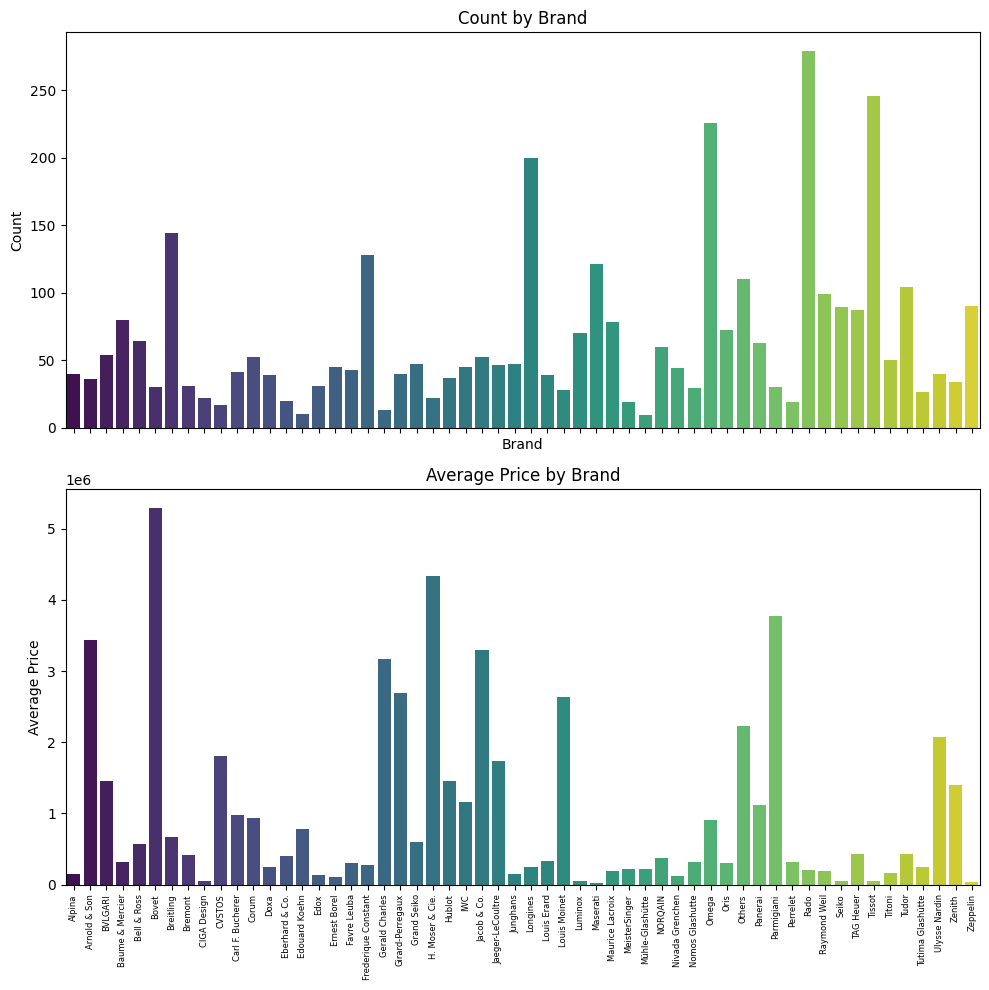

In [79]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

sns.barplot(data=brand_counts, x='Brand', y='count', palette='viridis', ax=axes[0])
axes[0].set_title('Count by Brand', fontsize=12)
axes[0].set_xlabel('Brand', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].tick_params(axis='x', rotation=90, labelsize=6)

sns.barplot(data=brand_wise_prices, x='Brand', y='price', palette='viridis', ax=axes[1])
axes[1].set_title('Average Price by Brand', fontsize=12)
axes[1].set_xlabel('')  # Remove x-axis label to avoid redundancy
axes[1].set_ylabel('Average Price', fontsize=10)
axes[1].tick_params(axis='x', rotation=90, labelsize=6)

plt.tight_layout()
plt.show()

Brand like Arnold & Sons, Bovet, Gerald Charles, Grard-Perregaux, H. Moder & Cle, Louis Monet, Parmigiani have high mean prices despite being low in numbers.

### Movement

A watch movement is the engine of a watch that acts as the powerhouse to make the watch and its functions operate.

In [80]:
movement_counts = df['Movement'].value_counts()

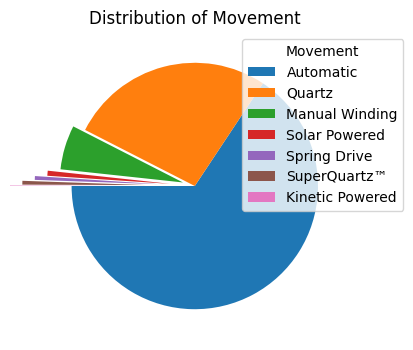

In [81]:
plt.figure(figsize=(4, 4))
plt.pie(
    movement_counts, 
#     labels=None, 
    startangle=180, 
    explode=[0,0,0.1,0.2,0.3,0.4,0.5]
    
)

plt.legend(
    labels=movement_counts.index, 
    title="Movement", 
    loc="upper right", 
    bbox_to_anchor=(1.2, 1)
)

plt.title('Distribution of Movement', fontsize=12)
# plt.legend()
plt.show()

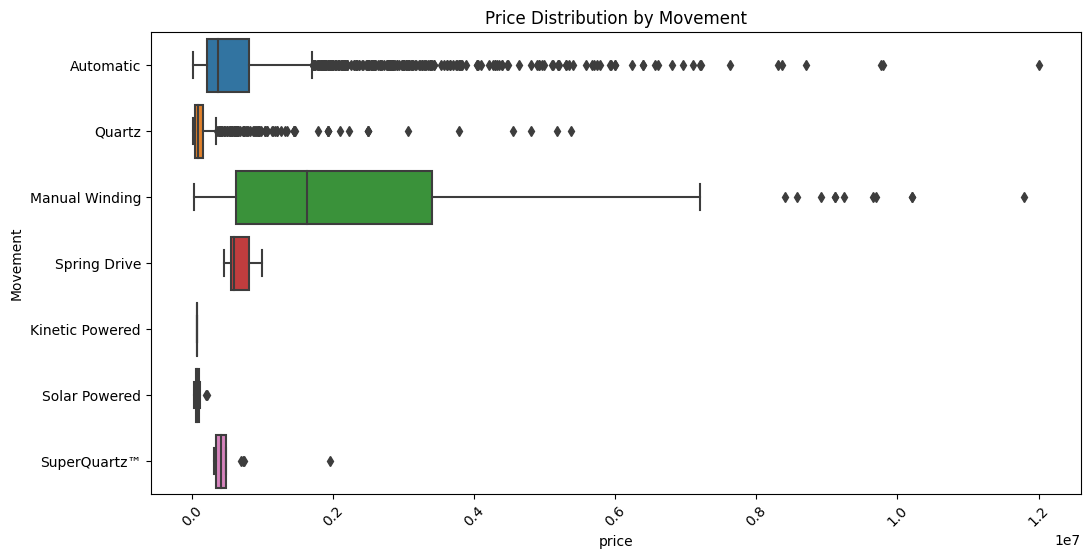

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Movement', x='price')
plt.title('Price Distribution by Movement', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [83]:
anova("Movement")

ANOVA F-statistic: 130.27272262583134, p-value: 1.060217004428859e-149
There is a significant impact of Movement on prices


From the above analysis, we can conclude that:

1. Automatic and Quartz movements are make up majority of the feature
2. Watch prices depend on this features

### Case Shape

In [84]:
df['Case Shape'].value_counts()

Case Shape
Round          3082
Cushion         150
Square          111
Tonneau          68
Rectangular      65
Oval             48
Octagon          46
Dodecagon        42
Drop             15
Barrel            9
Hexagon           1
Name: count, dtype: int64

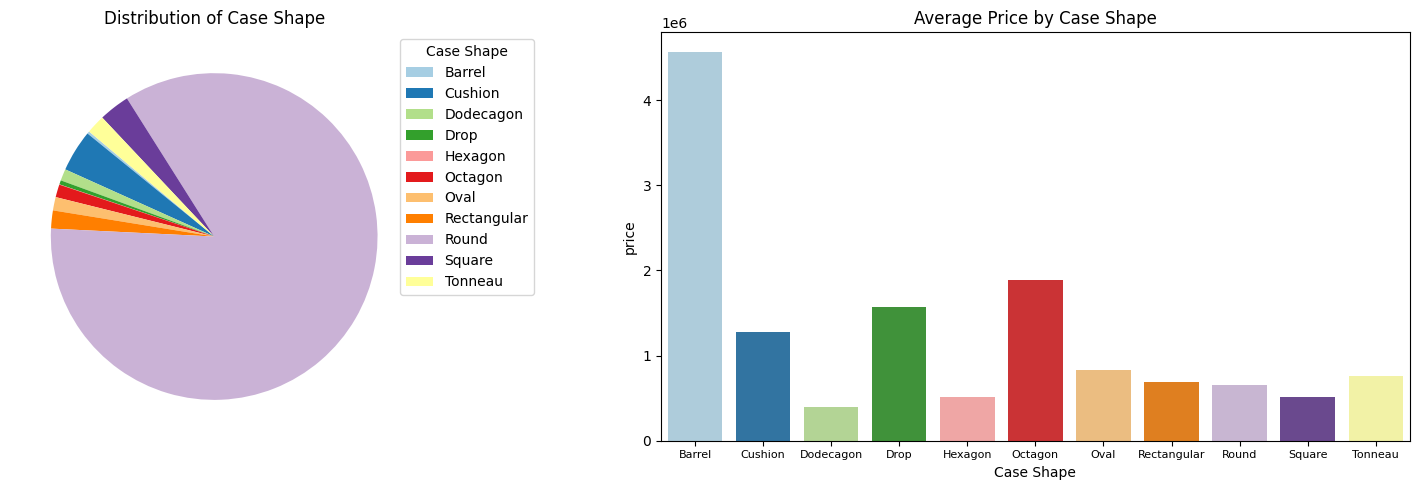

In [85]:
plot_categorical_feature('Case Shape')

In [86]:
anova('Case Shape')

ANOVA F-statistic: 20.05704811531159, p-value: 1.4443439054253274e-36
There is a significant impact of Case Shape on prices


Conclusions:

1. Unique shapes like barrel, octagon, drop have high value but low quantity
2. Feature is dominated by Round
3. Hexagon might cause some issue, should drop?

### Case Material

In [87]:
df['Case Material'].value_counts()

Case Material
Steel           2123
G-S Hybrid       605
Ceramic          345
Titanium         254
Gold             173
Carbon-based      55
Bronze            40
Others            26
Platinum          14
Aluminium          2
Name: count, dtype: int64

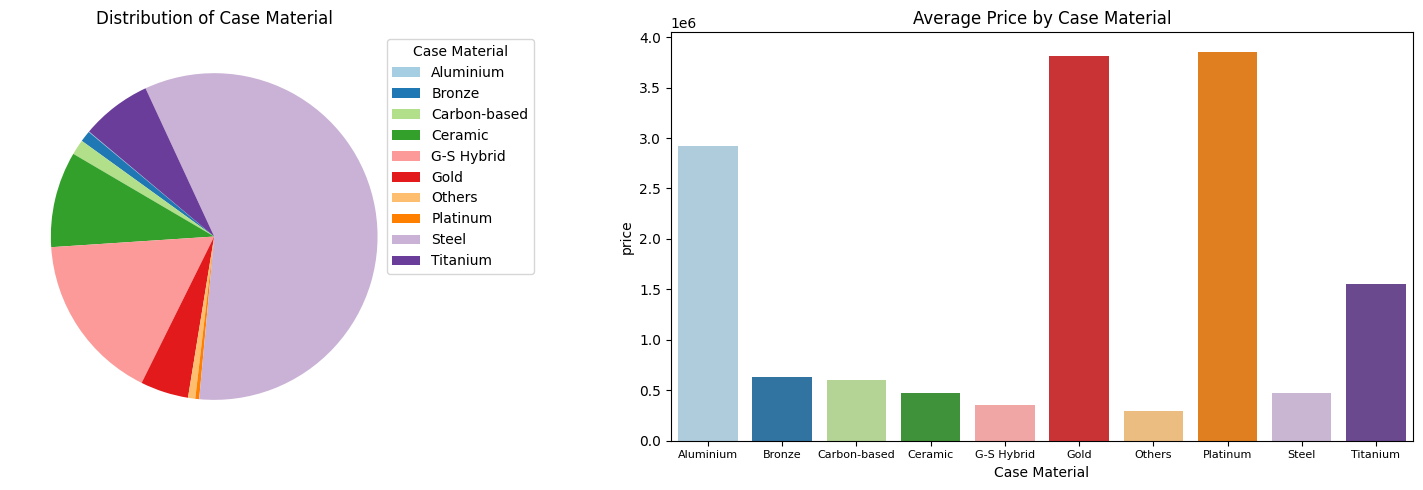

In [88]:
plot_categorical_feature('Case Material')

In [89]:
anova("Case Material")

ANOVA F-statistic: 291.04862172161796, p-value: 0.0
There is a significant impact of Case Material on prices


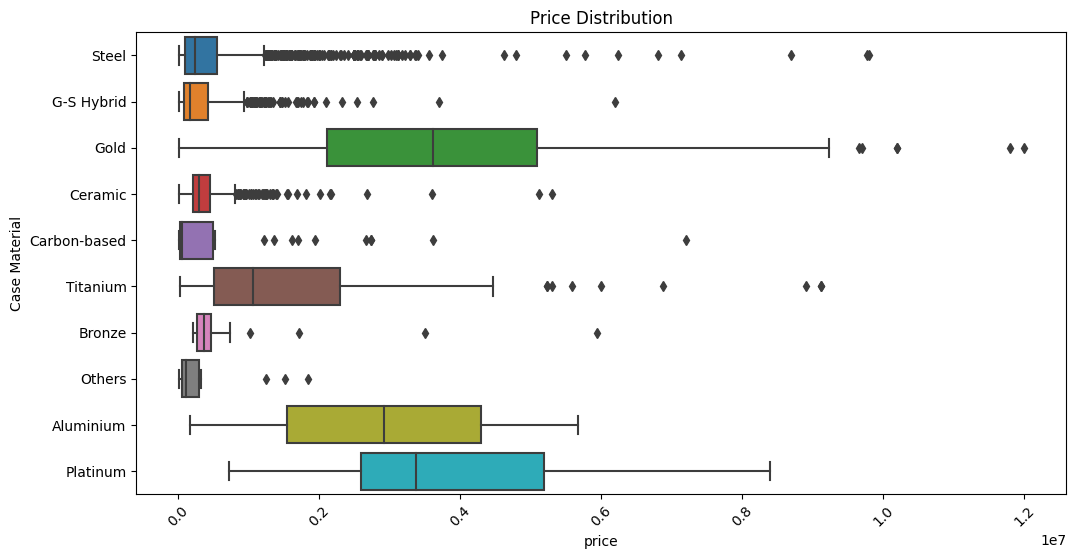

In [90]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Case Material', x='price')
plt.title('Price Distribution', fontsize=12)
plt.xticks(rotation=45)
plt.show()

PVD (Physical Vapour Deposition), DLC (Diamond-like carbon) and CVD (Chemical Vapour Deposition) are coating techniques used to deposit a thin-film on the surface of the material to provide some properties

In [91]:
df['Case Material Coating'] = df['Case Material Coating'].fillna('None')
temp_df = df[['Case Material', 'Case Material Coating']]
temp_df = temp_df[temp_df['Case Material Coating'] != 'None']

In [92]:
coating_material_counts = temp_df.groupby('Case Material Coating')['Case Material'].value_counts()
coating_material_counts = coating_material_counts.reset_index(name='Count')

highest_combo_per_coating = coating_material_counts.loc[
    coating_material_counts.groupby('Case Material Coating')['Count'].idxmax()
]

coating_material_counts

,Case Material Coating,Case Material,Count
0,CVD,Others,3
1,CVD,Steel,1
2,DLC,Steel,37
3,DLC,Titanium,25
4,DLC,Ceramic,4
5,DLC,G-S Hybrid,1
6,DLC,Gold,1
7,PVD,G-S Hybrid,387
8,PVD,Steel,108
9,PVD,Titanium,15


In [93]:
highest_combo_per_coating

,Case Material Coating,Case Material,Count
0,CVD,Others,3
2,DLC,Steel,37
7,PVD,G-S Hybrid,387


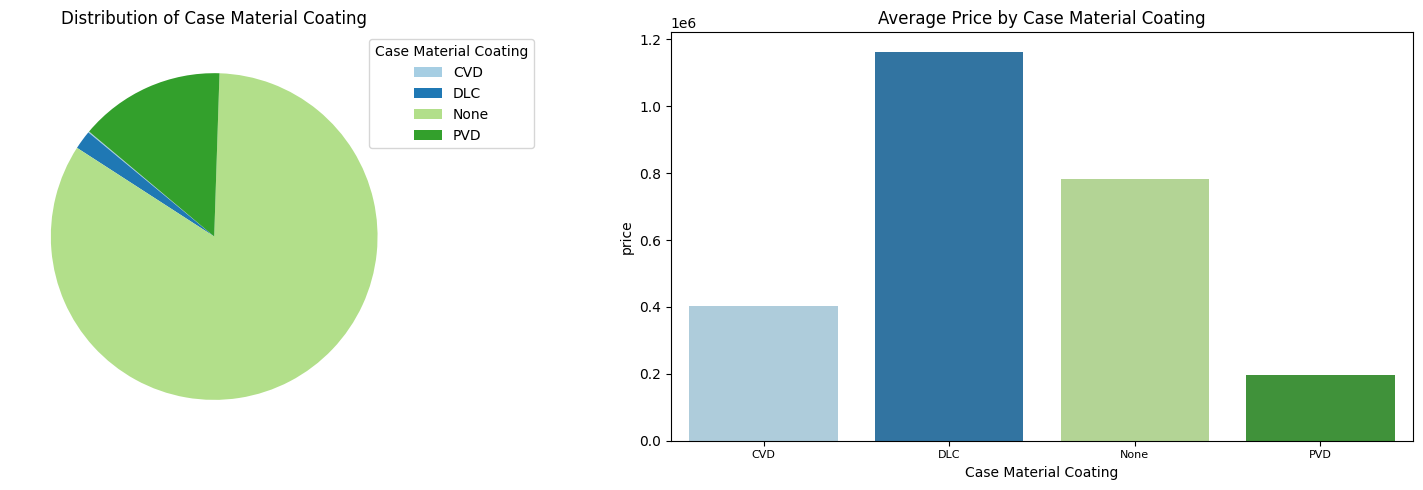

In [94]:
plot_categorical_feature('Case Material Coating')

In [95]:
anova("Case Material Coating")

ANOVA F-statistic: 39.640906330934705, p-value: 3.358823509755787e-25
There is a significant impact of Case Material Coating on prices


Insights:
1. Gold, Titanium and Platinum are expensive. duhh
2. Aluminium is also expensive but there are only 2 watches, so the price could be a result of other factors.
3. DLC coating increases the price significantly or maybe it's because there are many watches with titanium base material which is already expensive by itself. We can drop this column after some more analysis
4. Surprisingly, Gold-enhanced steel isn't very expensive

Reason for price difference in coating is because:
1. DLC: High price due to complex processes, superior hardness, and luxury branding, making it exclusive and durable.
2. PVD: Affordable because it’s a simpler, faster process with decent durability, suitable for mass production (That's why steel is a prominent base material for this coating).
3. CVD: Expensive due to intricate gas-phase reactions and use in premium, high-precision applications like synthetic diamonds.

Other factors also influence the prices

In [96]:
df[regular_col].columns

Index(['price', 'Brand', 'Movement', 'Case Size', 'Case Thickness',
       'Case Shape', 'Case Material', 'Glass Material', 'Hands', 'Indexes',
       'Strap Material', 'Clasp Type', 'Gender', 'Water Resistance (M)',
       'Warranty Period', 'Country of Origin', 'Display', 'Power Reserve',
       'Jewels', 'Interchangeable Strap', 'Bezel', 'Limited Edition',
       'Frequency (bph)', 'Case Material Coating'],
      dtype='object')

### Glass Material

In [97]:
df['Glass Material'].value_counts()

Glass Material
Sapphire Crystal    3367
Mineral Crystal      217
Hardlex Crystal       36
Others                17
Name: count, dtype: int64

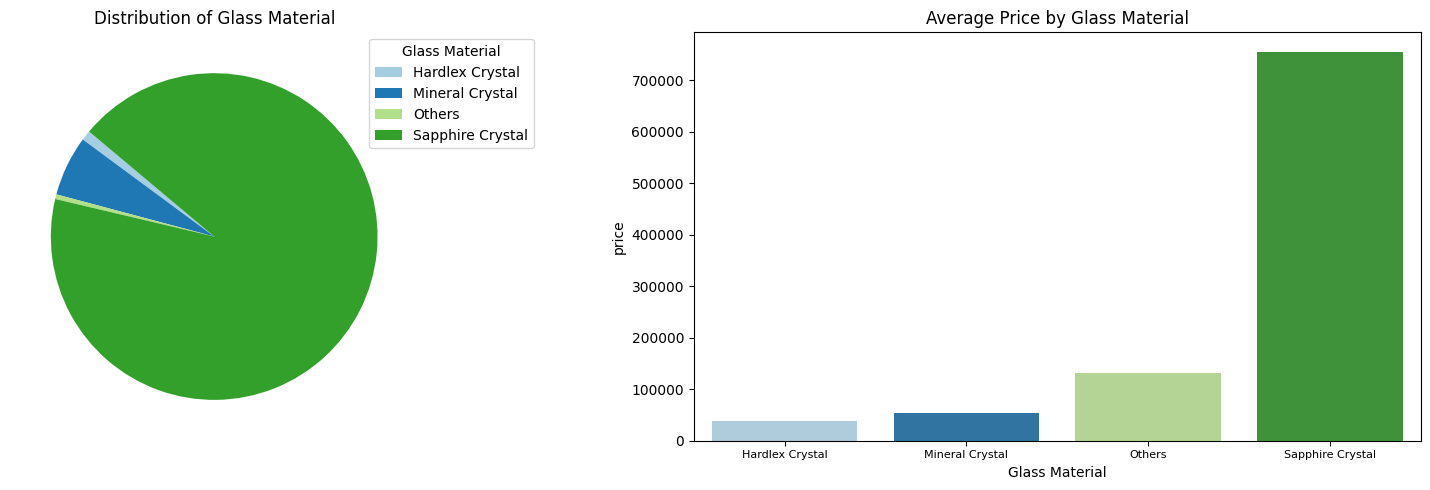

In [98]:
plot_categorical_feature('Glass Material')

Insights:
1. Sapphire Crystal is the most expensive while also being the most abundant. Maybe abundancy is the reason for the price, as it encapsulates a lot of other diverse features in it, which might be affecting the prices. 
    

### Strap Material

In [99]:
df['Strap Material'].value_counts()

Strap Material
Leather       1127
Steel         1114
Rubber         623
G-S Hybrid     419
Others         114
Ceramic         72
Titanium        54
Silicone        44
Gold            43
Nylon           17
Satin            6
Bronze           4
Name: count, dtype: int64

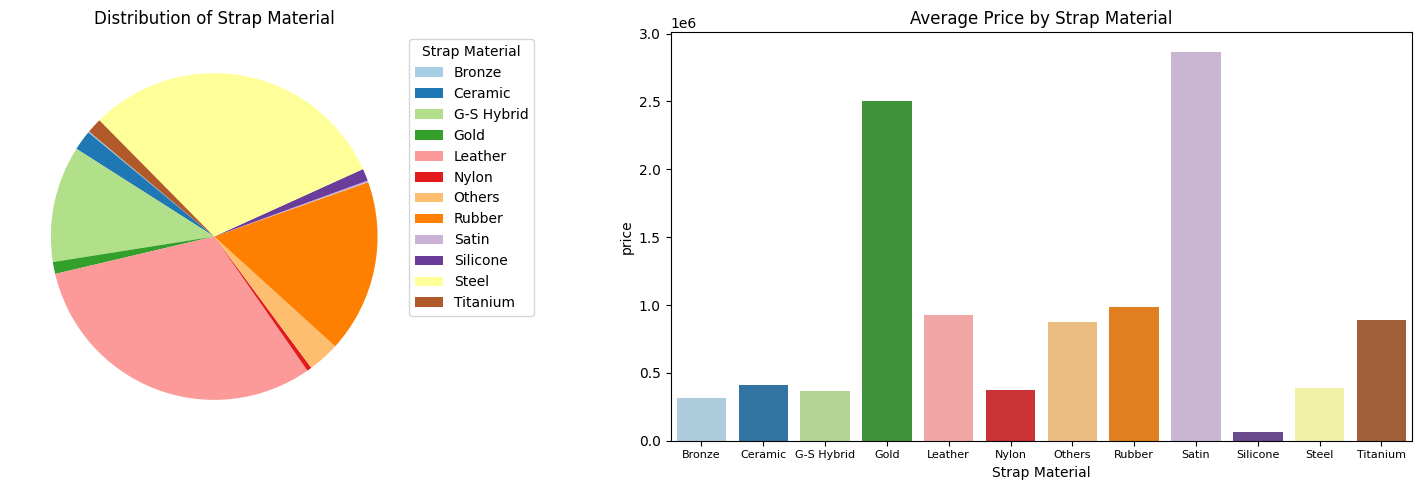

In [100]:
plot_categorical_feature('Strap Material')

### Clasp Type

In [101]:
df['Clasp Type'].value_counts()

Clasp Type
Folding                1497
Others                  984
Tang                    901
Butterfly               227
Winged Clasp             15
Hook-and-loop            12
Tudor “T-fit” Clasp       1
Name: count, dtype: int64

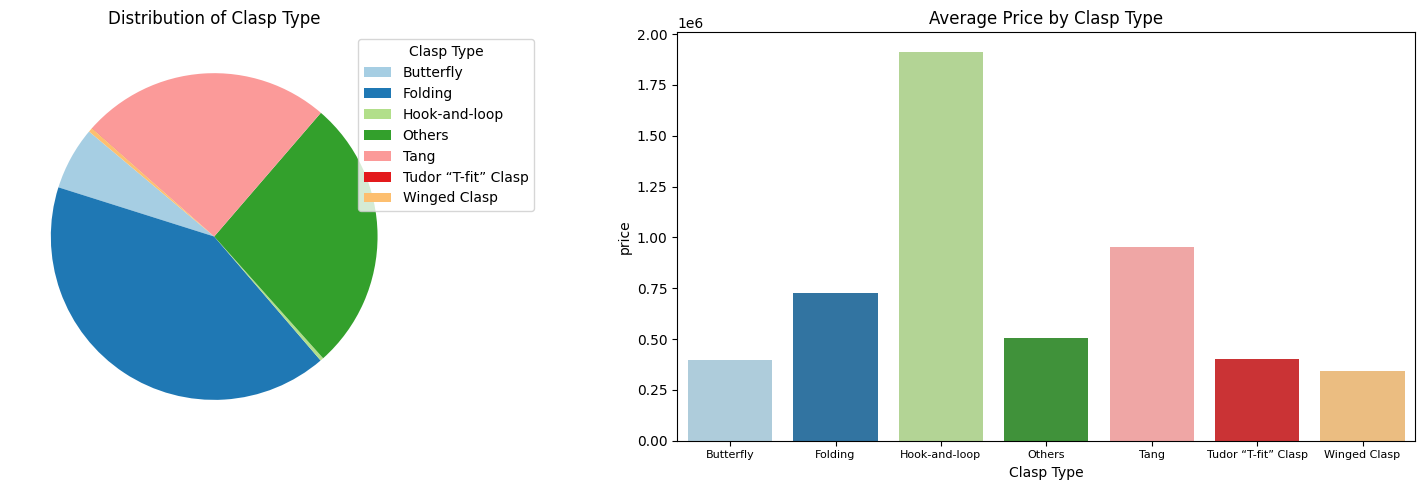

In [102]:
plot_categorical_feature('Clasp Type')

Insights:
1. Only 1 tudor. we can probably drop it

### Gender

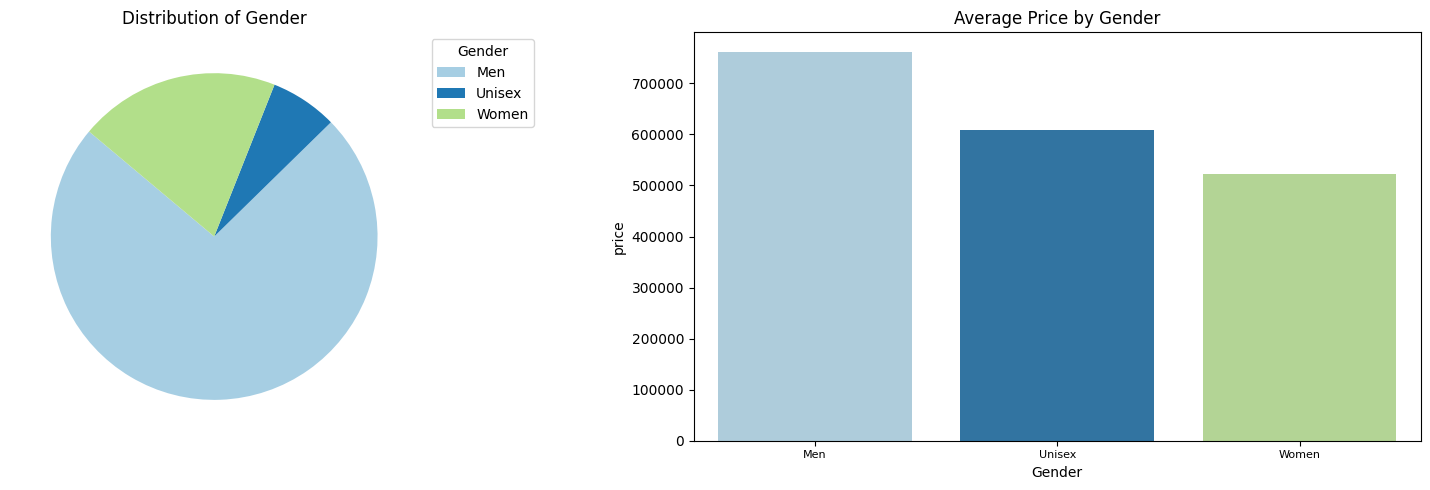

In [103]:
plot_categorical_feature('Gender')

Insights:
1. Men's watches are expensive. It could be because the size difference of the watches. This impact of size can also be seen in Unisex and Women watches. Unisex watches are more expensive than women's watches despite being less in number

In [104]:
df['Display'].value_counts()

Display
Analog                2600
Hybrid Smart Watch       4
Name: count, dtype: int64

Remove this column

### Interchangeable Strap

Straps that can be changed 

In [105]:
df['Interchangeable Strap'].value_counts()

Interchangeable Strap
0    3252
1     385
Name: count, dtype: int64

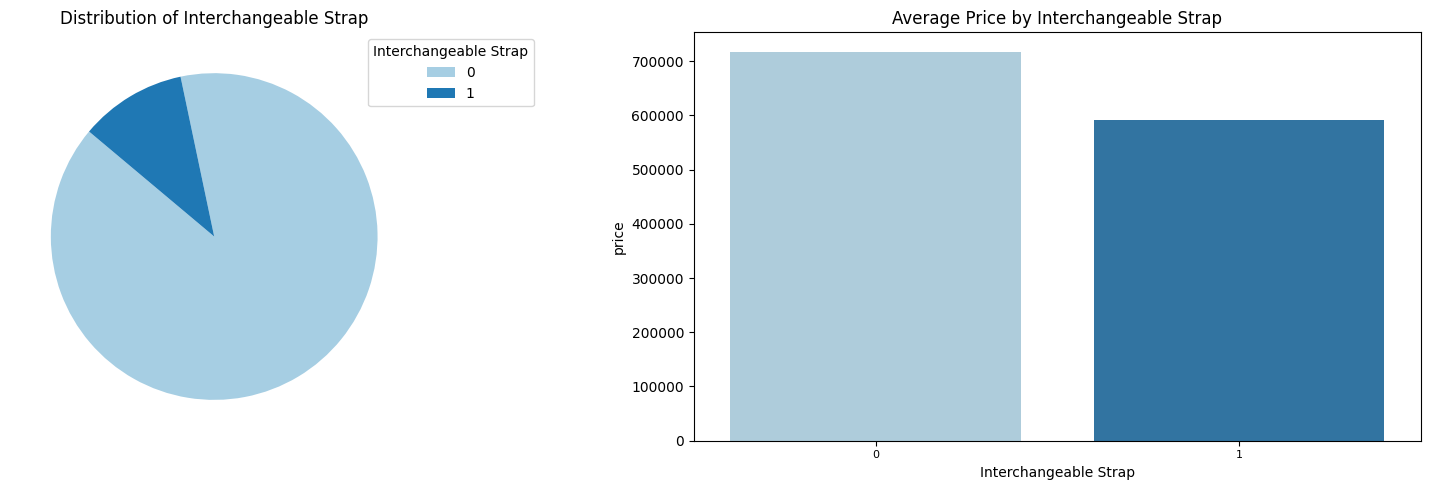

In [106]:
plot_categorical_feature('Interchangeable Strap')

In [107]:
from scipy.stats import ttest_ind

group1 = df[df['Interchangeable Strap'] == 0]['price']
group2 = df[df['Interchangeable Strap'] == 1]['price']
stat, p_value = ttest_ind(group1, group2)

print(f"T-test statistic: {stat}, p-value: {p_value}")

T-test statistic: 1.9483836193256103, p-value: 0.051445930505254485


The p value is above the threshold (0.05), therefore we cannot be sure if the feature has any impact on the price

### Bezel

Bezel is a ring that surrounds the face of the watch, serving both as a protective guard for the crystal and as an aesthetic frame for your watch's dial.

In [108]:
df['Bezel'].value_counts()

Bezel
No Bezel                                  2908
Unidirectional Rotating Bezel              579
Bi-directional Rotating Bezel              129
Internal Unidirectional Rotating Bezel      21
Name: count, dtype: int64

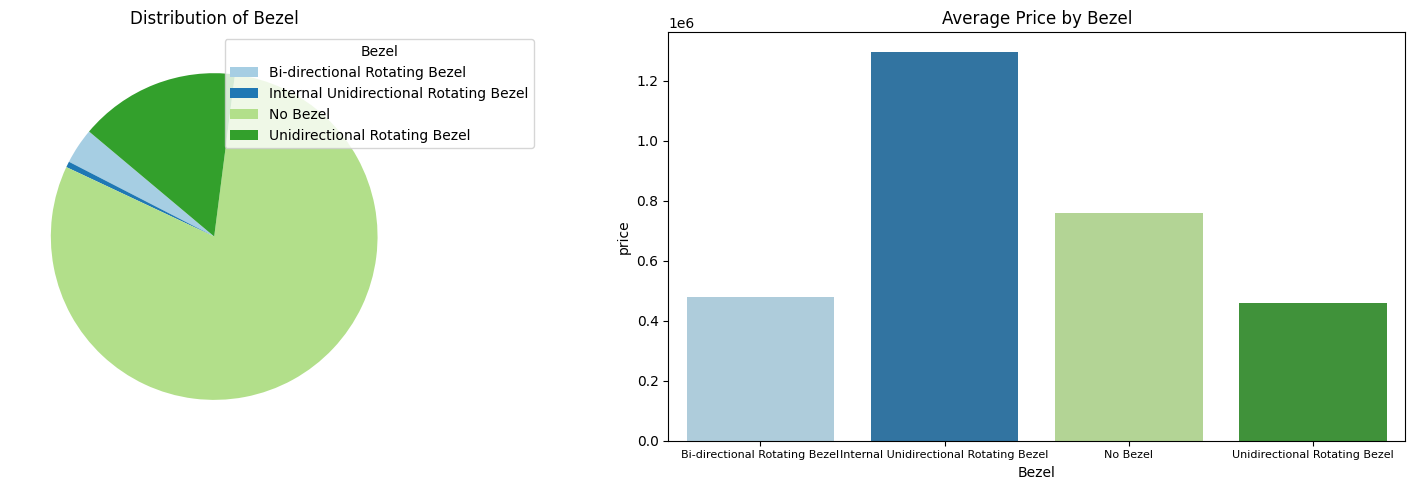

In [109]:
plot_categorical_feature('Bezel')

In [110]:
anova('Bezel')

ANOVA F-statistic: 13.191615042255084, p-value: 1.4516654755141953e-08
There is a significant impact of Bezel on prices


Insights:
1. Internal Unidirectional Bezel is a premium feature, that's why it is expensive compared to others

### Limited Edition

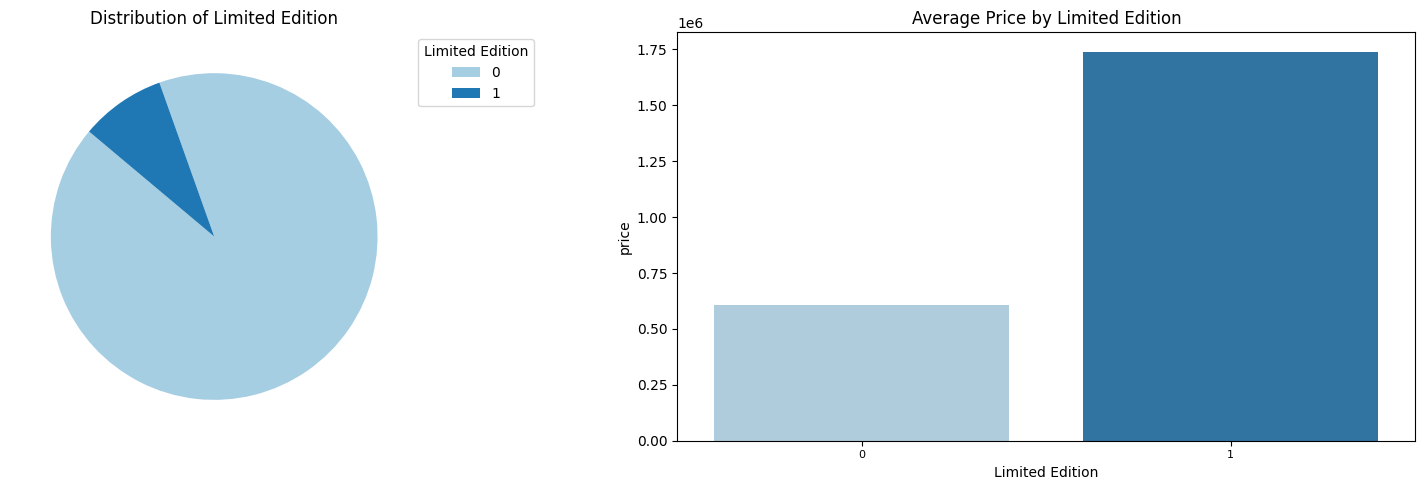

In [111]:
plot_categorical_feature('Limited Edition')

In [112]:
group1 = df[df['Limited Edition'] == 0]['price']
group2 = df[df['Limited Edition'] == 1]['price']
stat, p_value = ttest_ind(group1, group2)

print(f"T-test statistic: {stat}, p-value: {p_value}")

T-test statistic: -16.301103817697115, p-value: 1.0311607127974645e-57


Insights:
1. Limited Edition watches are expensive

In [113]:
df['Country of Origin'].value_counts()

Country of Origin
Switzerland    3121
Germany         201
China           145
Japan           136
England          31
Netherlands       3
Name: count, dtype: int64

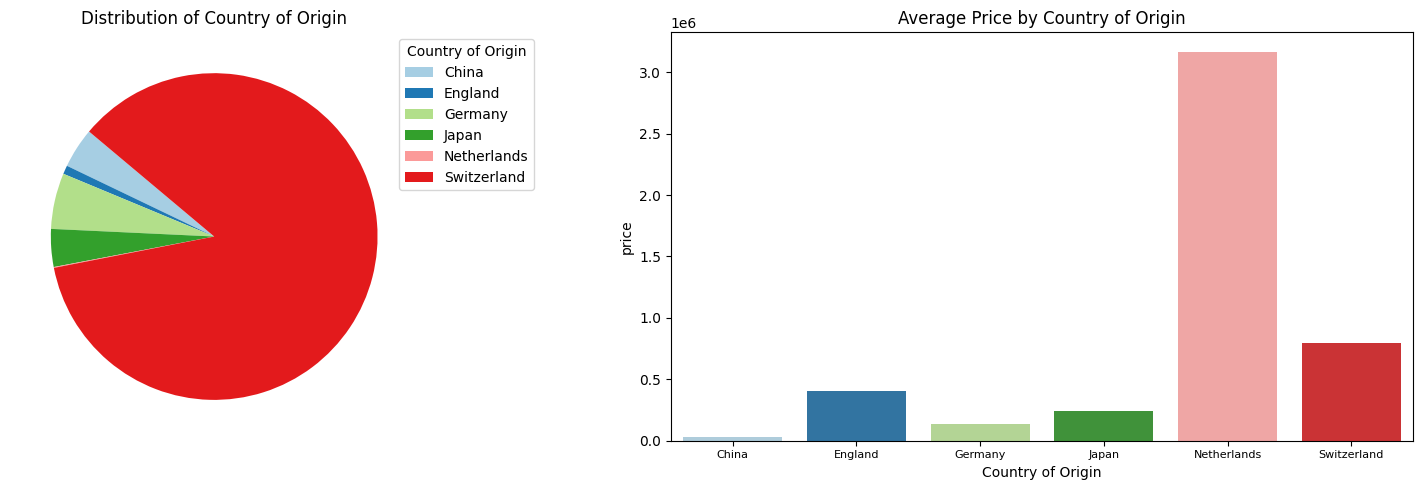

In [114]:
plot_categorical_feature('Country of Origin')

Insights:
1. Netherlands has only 3 watches that's why it has the highest mean.

In [115]:
df[regular_col].columns

Index(['price', 'Brand', 'Movement', 'Case Size', 'Case Thickness',
       'Case Shape', 'Case Material', 'Glass Material', 'Hands', 'Indexes',
       'Strap Material', 'Clasp Type', 'Gender', 'Water Resistance (M)',
       'Warranty Period', 'Country of Origin', 'Display', 'Power Reserve',
       'Jewels', 'Interchangeable Strap', 'Bezel', 'Limited Edition',
       'Frequency (bph)', 'Case Material Coating'],
      dtype='object')

In [116]:
### Case Size

In [147]:
def plot_numerical(col, figsize=(25,8)):
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    sns.histplot(df[col], kde=True, bins=10, ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f'Distribution {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    sns.scatterplot(data=df, x=col, y='price', s=30, ax=axes[1], color='orange')
    axes[1].set_title(f'{col} vs Price')
    axes[1].set_xlabel(f'{col}')
    axes[1].set_ylabel('Price')

    sns.boxplot(data=df, x=col, ax=axes[2], color='lightgreen')
    axes[2].set_title(f'Boxplot of {col}')
    axes[2].set_xlabel(col)

    plt.tight_layout()

    # Show the plots
    plt.show()
    
    correlation = df[col].corr(df['price'])
    print(f"Pearson correlation: {correlation}")

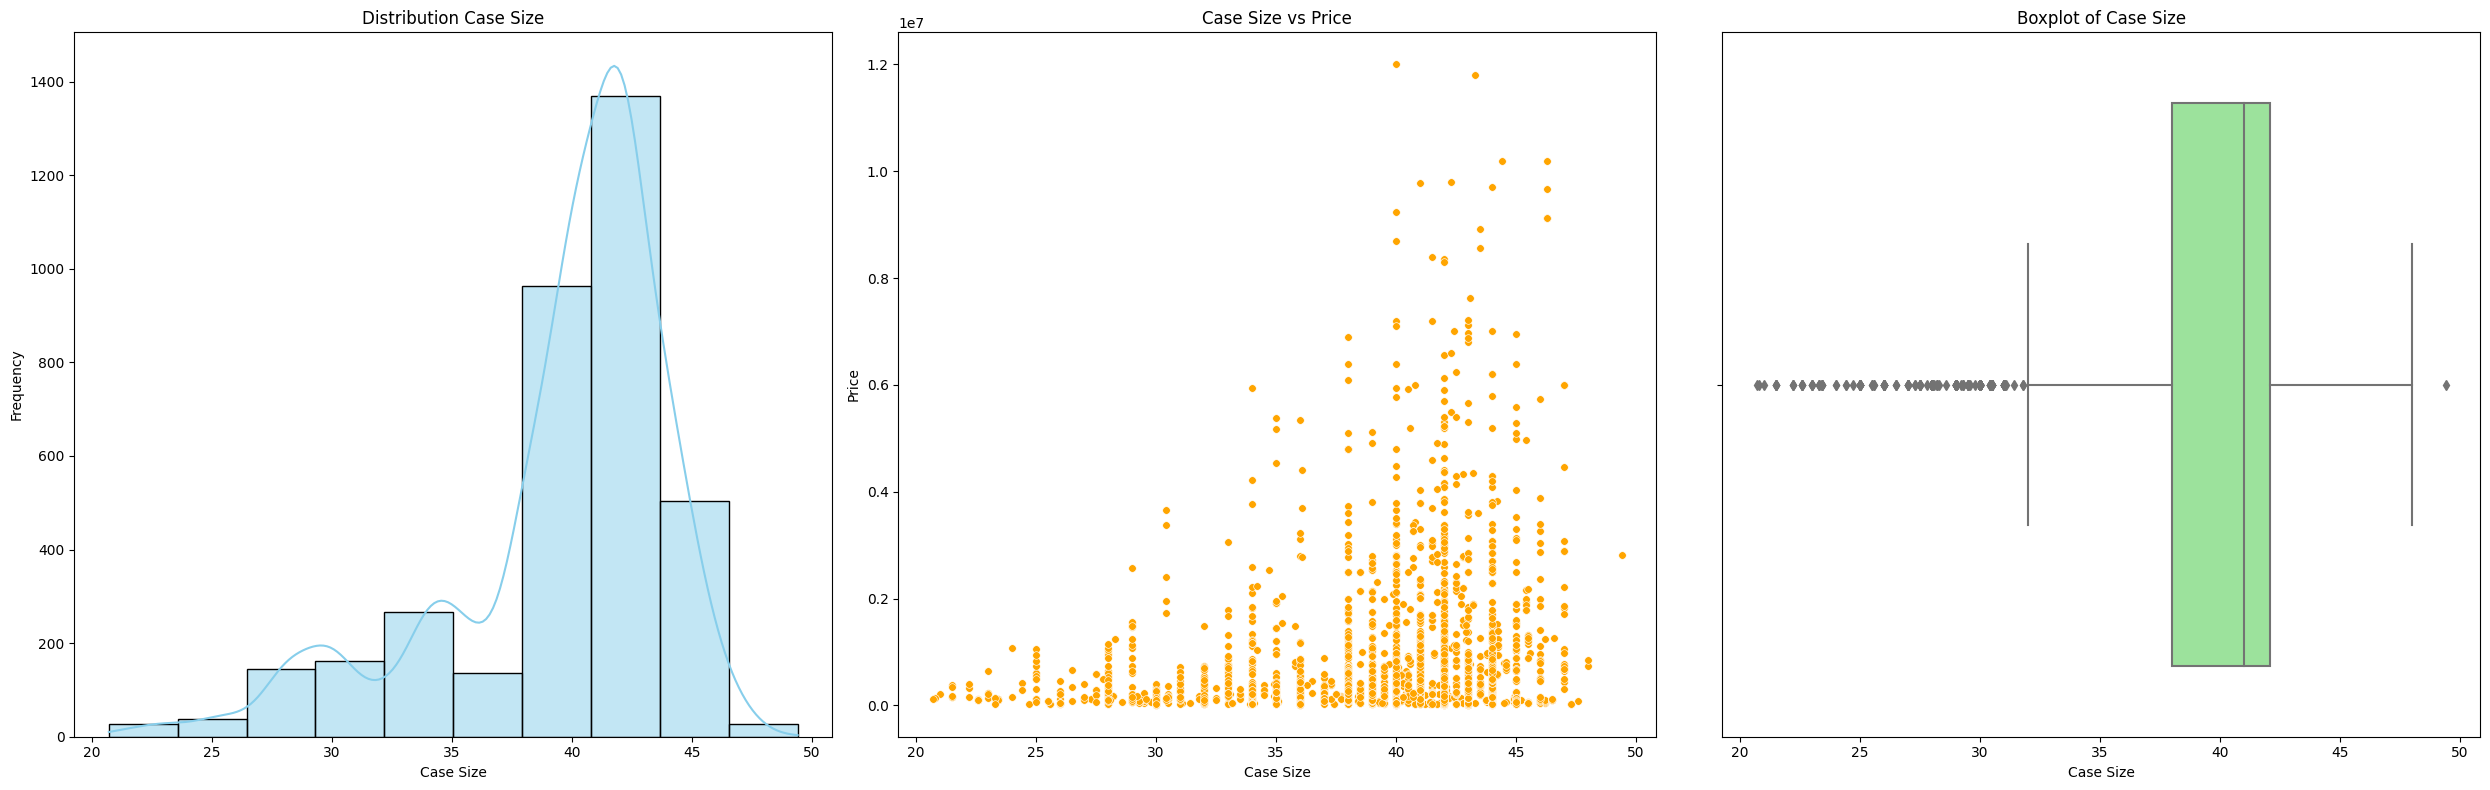

Pearson correlation: 0.15739740068703734


In [118]:
plot_numerical('Case Size')

Insights:
1. Feature is left skewed.
2. Lower sizes doesn't seem to be outliers because there seems a slight linear relationship between the size and maximum price

### Case Thickness

In [130]:
df = df.drop(df[df['Case Thickness'] > 200].index)

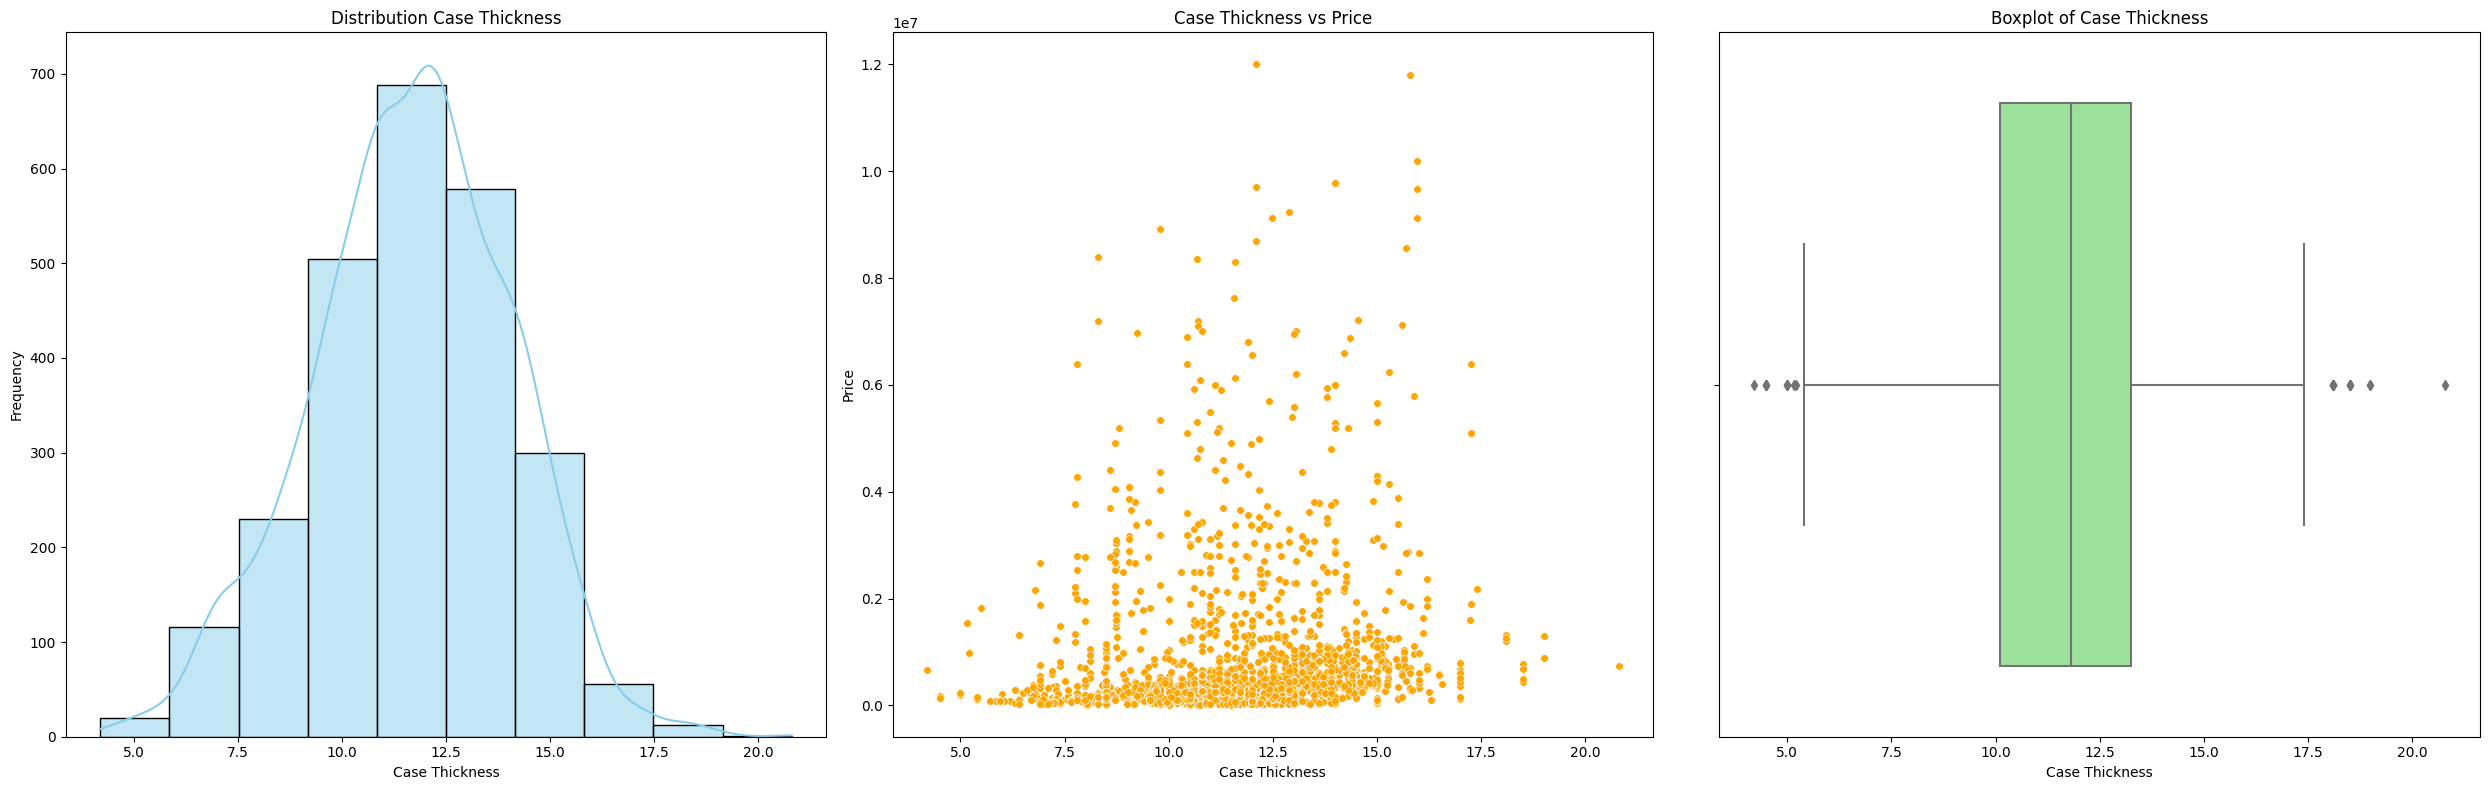

Pearson correlation: 0.12375670123588804


In [131]:
plot_numerical('Case Thickness')

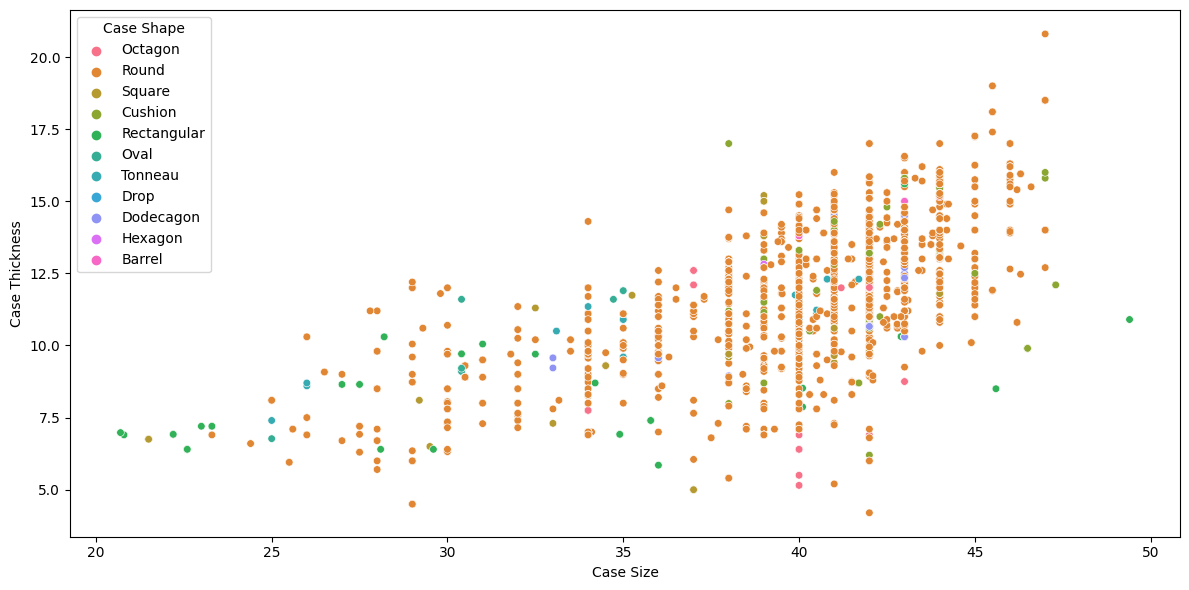

In [138]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Case Size', y='Case Thickness', s=30, color='red', hue='Case Shape')
plt.tight_layout()
plt.show()

In [133]:
for shape in df['Case Shape'].unique():
    shape_thickness = df[df['Case Shape'] == shape]['Case Thickness'] 
    null_vals = shape_thickness.isnull().sum()
    print("For shape " + shape)
    print("Null values " + f"{null_vals}/{len(shape_thickness)}")
    print(" ")

For shape Octagon
Null values 6/46
 
For shape Round
Null values 953/3081
 
For shape Square
Null values 16/111
 
For shape Cushion
Null values 54/150
 
For shape Rectangular
Null values 25/65
 
For shape Oval
Null values 33/48
 
For shape Tonneau
Null values 26/68
 
For shape Drop
Null values 15/15
 
For shape Dodecagon
Null values 2/42
 
For shape Hexagon
Null values 0/1
 
For shape Barrel
Null values 1/9
 


In [136]:
correlation = df['Case Size'].corr(df['Case Thickness'])
print(f"Pearson Correlation between 'Case Size' and 'price': {correlation}")

Pearson Correlation between 'Case Size' and 'price': 0.6306532415238902


Insights:
1. The feature is normally distributed
2. There doesn't seem any linear relation between the thickness and the price
3. Case Thickness and Case Size are linearly related
4. Case Thickness contains many empty values. Some case shapes have majority (Drop, Oval, Cushion) of thickness values missing. As thickness and size depends on the shape, it might be difficult to impute the missing values for these shapes.
    Maybe we can drop the column as there are signs of multicollinearity with Case Size

In [ ]:
### Water Resistance

In [152]:
df.loc[df['Water Resistance (M)'] == 6000, 'Water Resistance (M)'] = 600

In [157]:
df['Water Resistance (M)'].isnull().sum()

5

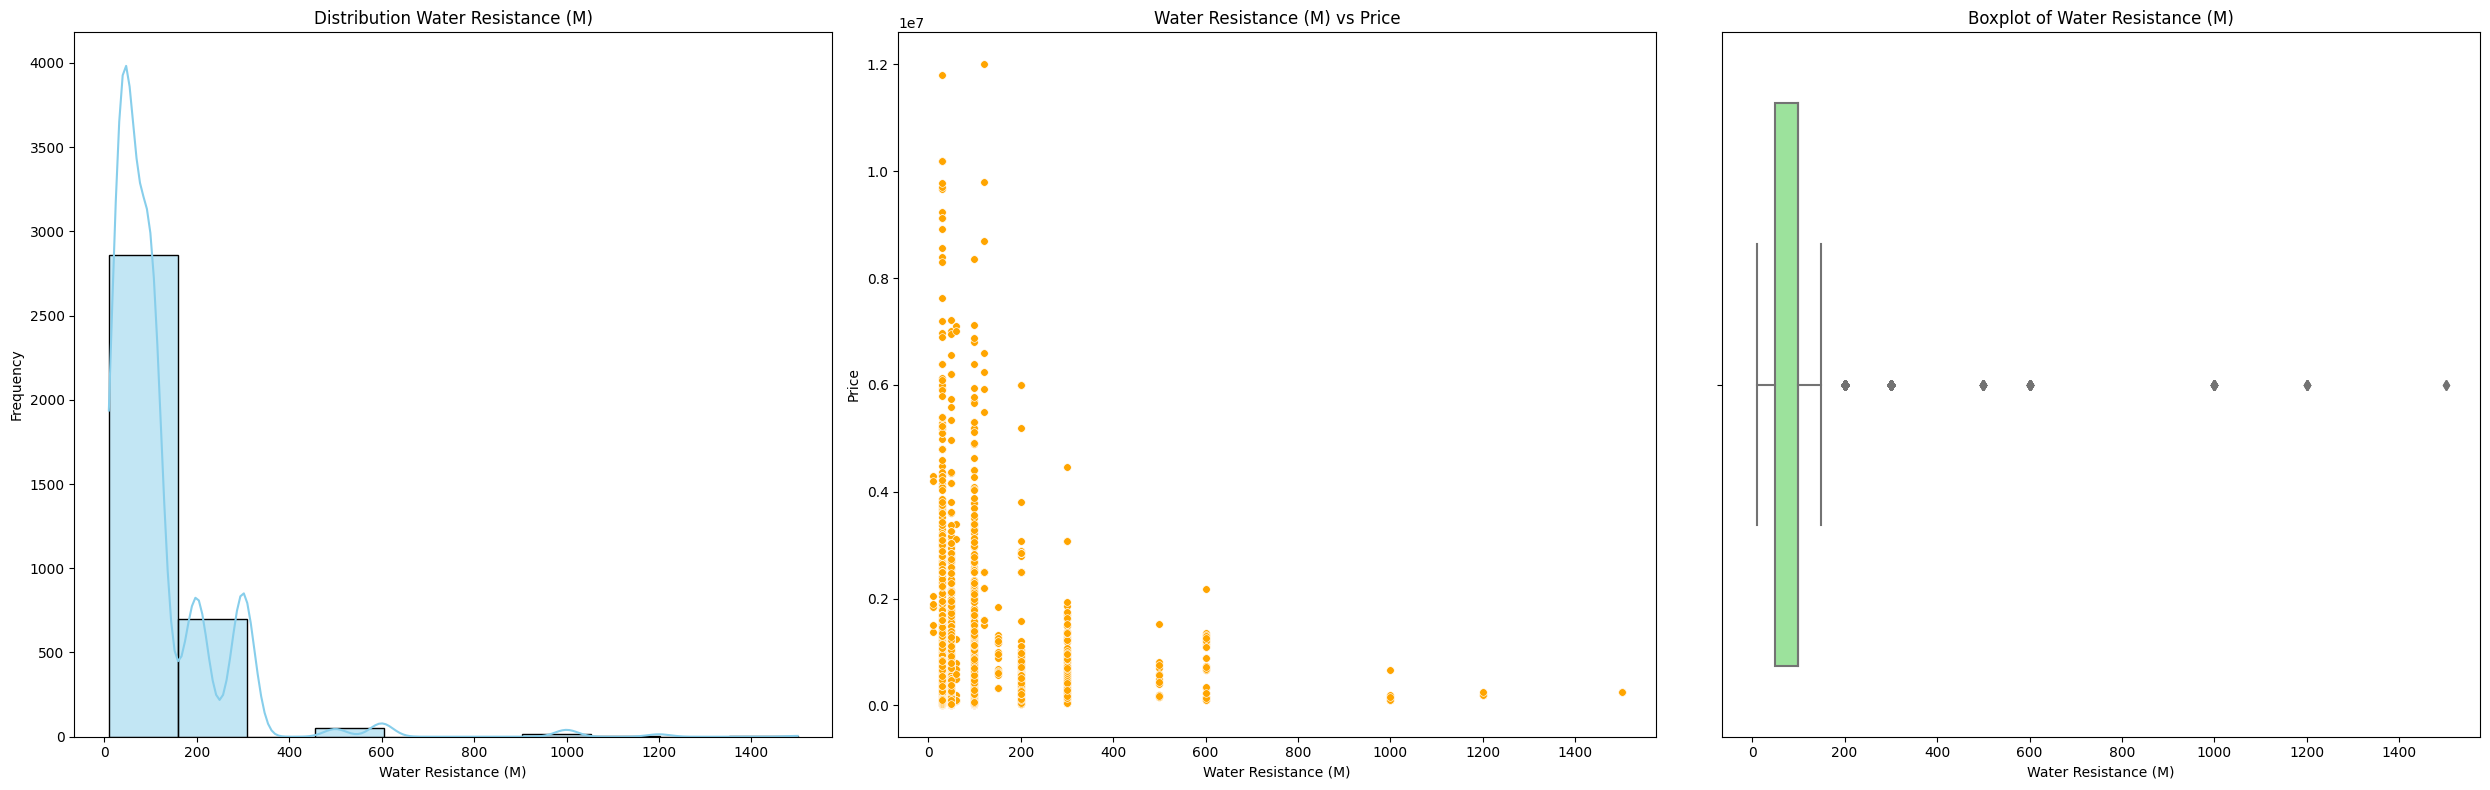

Pearson correlation: -0.10105846955583682


In [153]:
plot_numerical('Water Resistance (M)')

In [158]:
# df[df['Water Resistance (M)'] > 800]

In [156]:
spearman_corr = df['Water Resistance (M)'].corr(df['price'], method='spearman')
print(f"Spearman correlation: {spearman_corr}")

Spearman correlation: -0.042006556992564795


Insights:
1. Values seem genuine. There are diving watches that have such high values
2. Data is highly right-skewed.
3. Doesn't seem any major relationship between the feature and price. There is a very slight inverse relation though

In [ ]:
#### Power Reserve

In [177]:
df['Power Reserve'].isnull().sum()

1313

In [167]:
# df[df['Power Reserve'] > 5000]

# These are dirty values becuase the 30000 hours would mean more than 3 years of power reserve 
# while the watch with maximum power reserve we have today is around 65-70 days

df.loc[df['Power Reserve'] > 5000, 'Power Reserve'] /= 1000

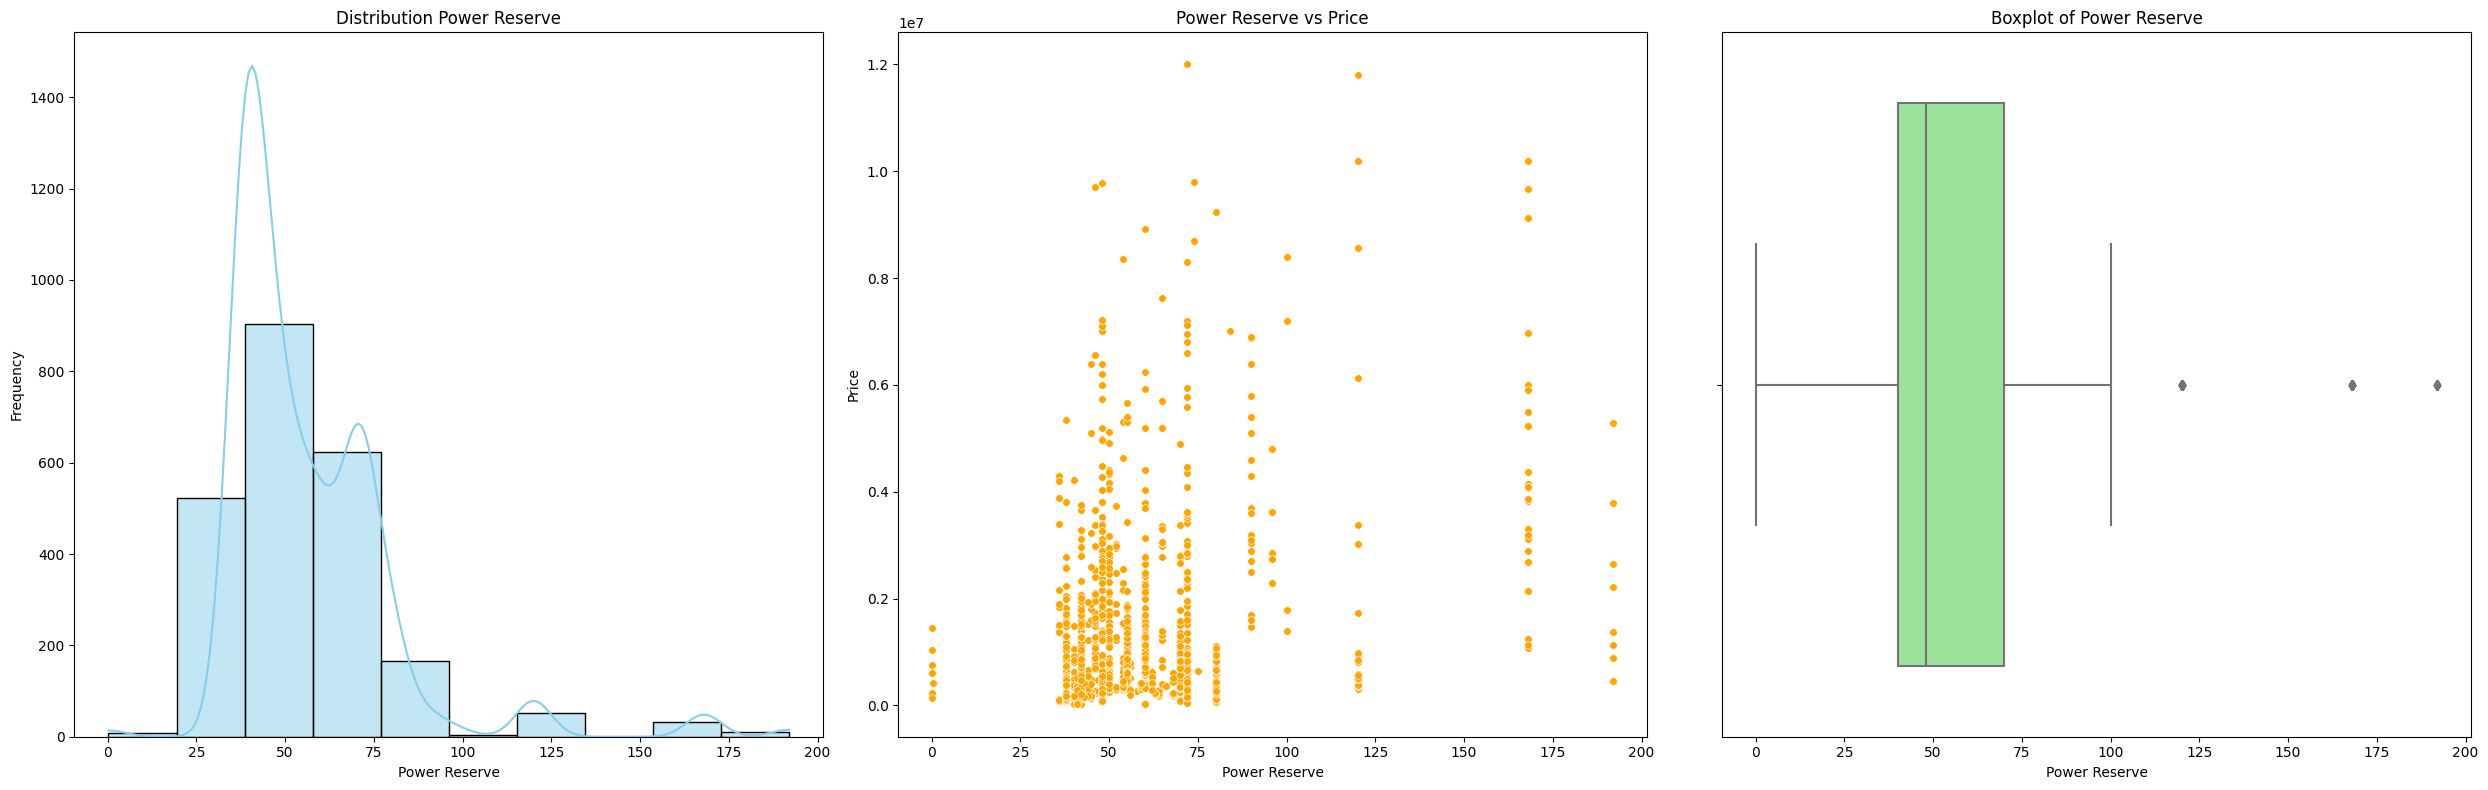

Pearson correlation: 0.3018818621537441


In [169]:
plot_numerical('Power Reserve')

In [183]:
mvmt_wise_power = df.groupby('Movement')['Power Reserve'].mean().reset_index()
mvmt_wise_power = mvmt_wise_power.sort_values(by='Movement')

In [184]:
mvmt_wise_power

,Movement,Power Reserve
0,Automatic,53.757041
1,Kinetic Powered,NaN
2,Manual Winding,83.974118
3,Quartz,0.269000
4,Solar Powered,NaN
5,Spring Drive,85.333333
6,SuperQuartz™,NaN


In [179]:
for shape in df['Movement'].dropna().unique():
    shape_thickness = df[df['Movement'] == shape]['Power Reserve'] 
    null_vals = shape_thickness.isnull().sum()
    print("For shape " + shape)
    print("Null values " + f"{null_vals}/{len(shape_thickness)}")
    print(" ")

For shape Automatic
Null values 288/2383
 
For shape Quartz
Null values 967/973
 
For shape Manual Winding
Null values 7/211
 
For shape Spring Drive
Null values 0/18
 
For shape Kinetic Powered
Null values 2/2
 
For shape Solar Powered
Null values 24/24
 
For shape SuperQuartz™
Null values 18/18
 


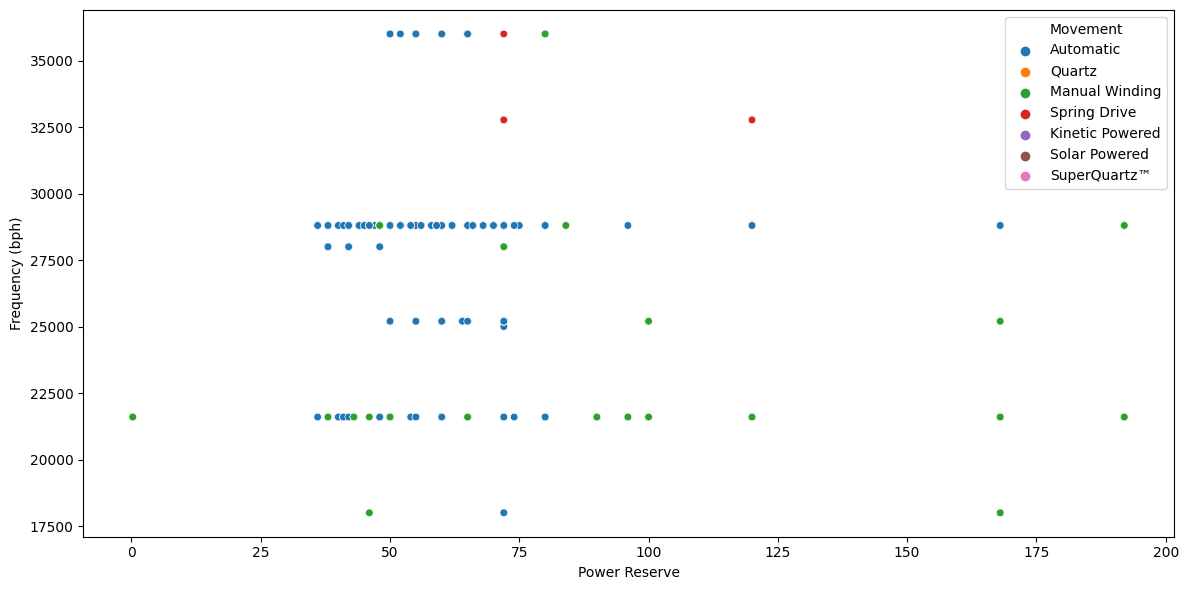

In [189]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Power Reserve', y='Frequency (bph)', s=30, color='red', hue='Movement')
plt.tight_layout()
plt.show()

In [188]:
spearman_corr = df['Power Reserve'].corr(df['Frequency (bph)'])
print(f"Spearman correlation: {spearman_corr}")

Spearman correlation: -0.29226219897032946


Insights:
1. Right skewed. 
2. Many empty values. Movement has a direct impact on the Power Reserve. Watches with automatic or manual movements often have a longer power reserve than quartz watches, which usually have very low or no power reserve.
    There are some movements with all power values empty. Need to find a way to impute this values
3. Inverse relationship between Power reserve and frequency

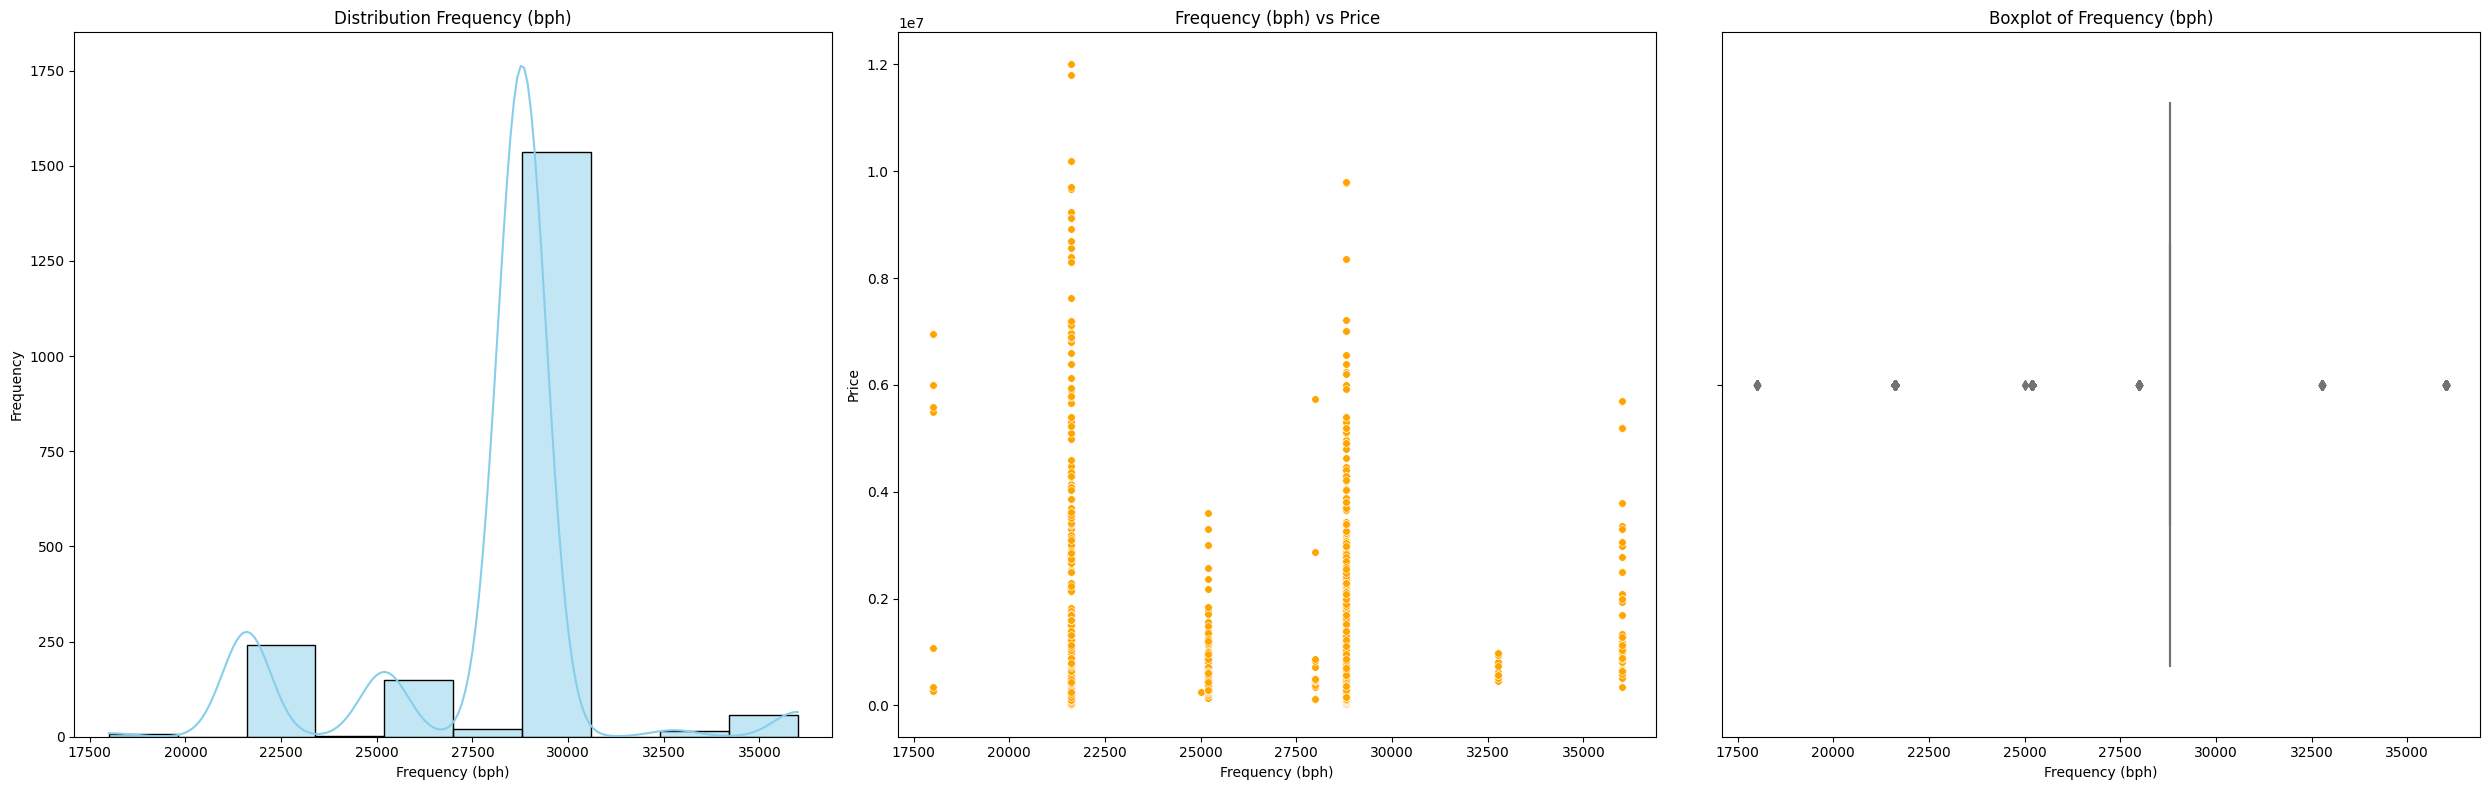

Pearson correlation: -0.2585010812013997


In [190]:
plot_numerical('Frequency (bph)')

In [198]:
from sklearn.preprocessing import LabelEncoder

temp_df = df[regular_col].copy()

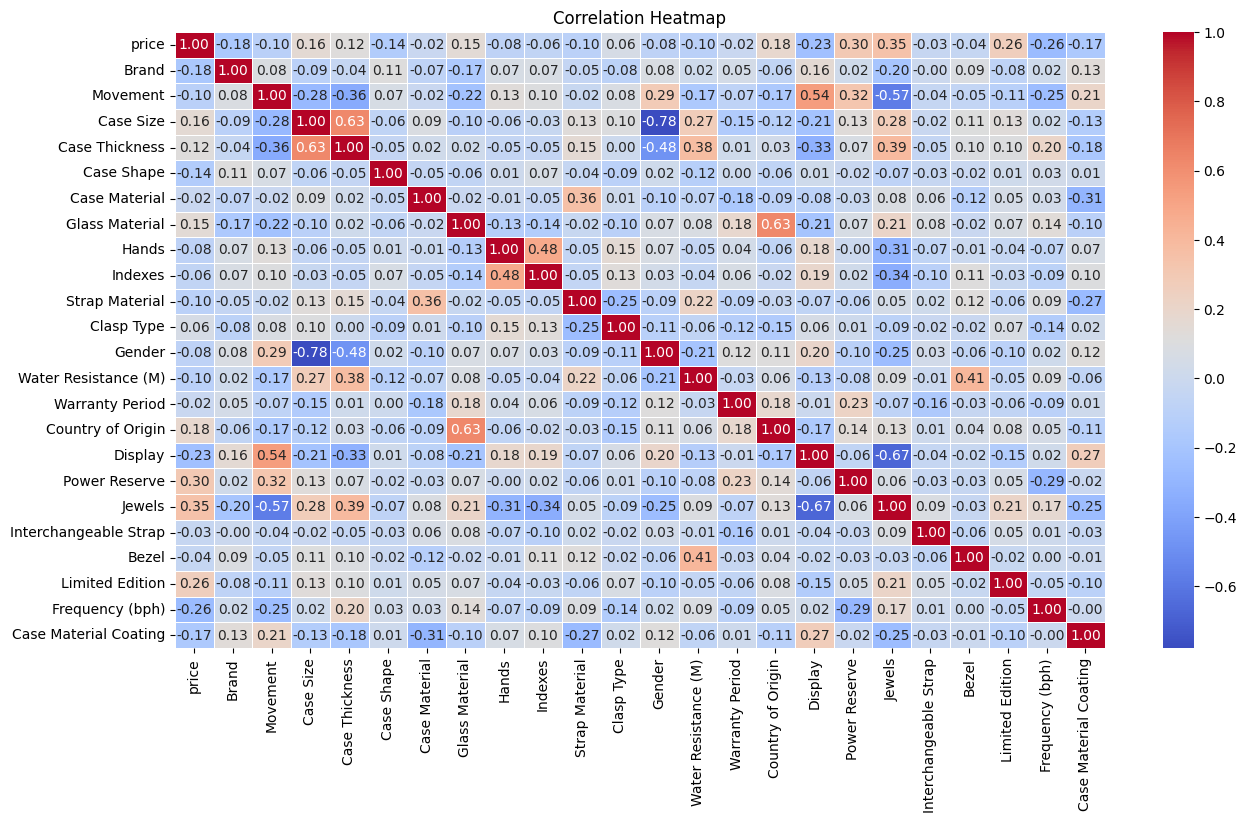

In [200]:
label_encoder = LabelEncoder()
obj_cols = temp_df.select_dtypes(include=['object']).columns

for col in obj_cols:
    temp_df[col] = label_encoder.fit_transform(temp_df[col])   
                                 
correlation_matrix = temp_df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

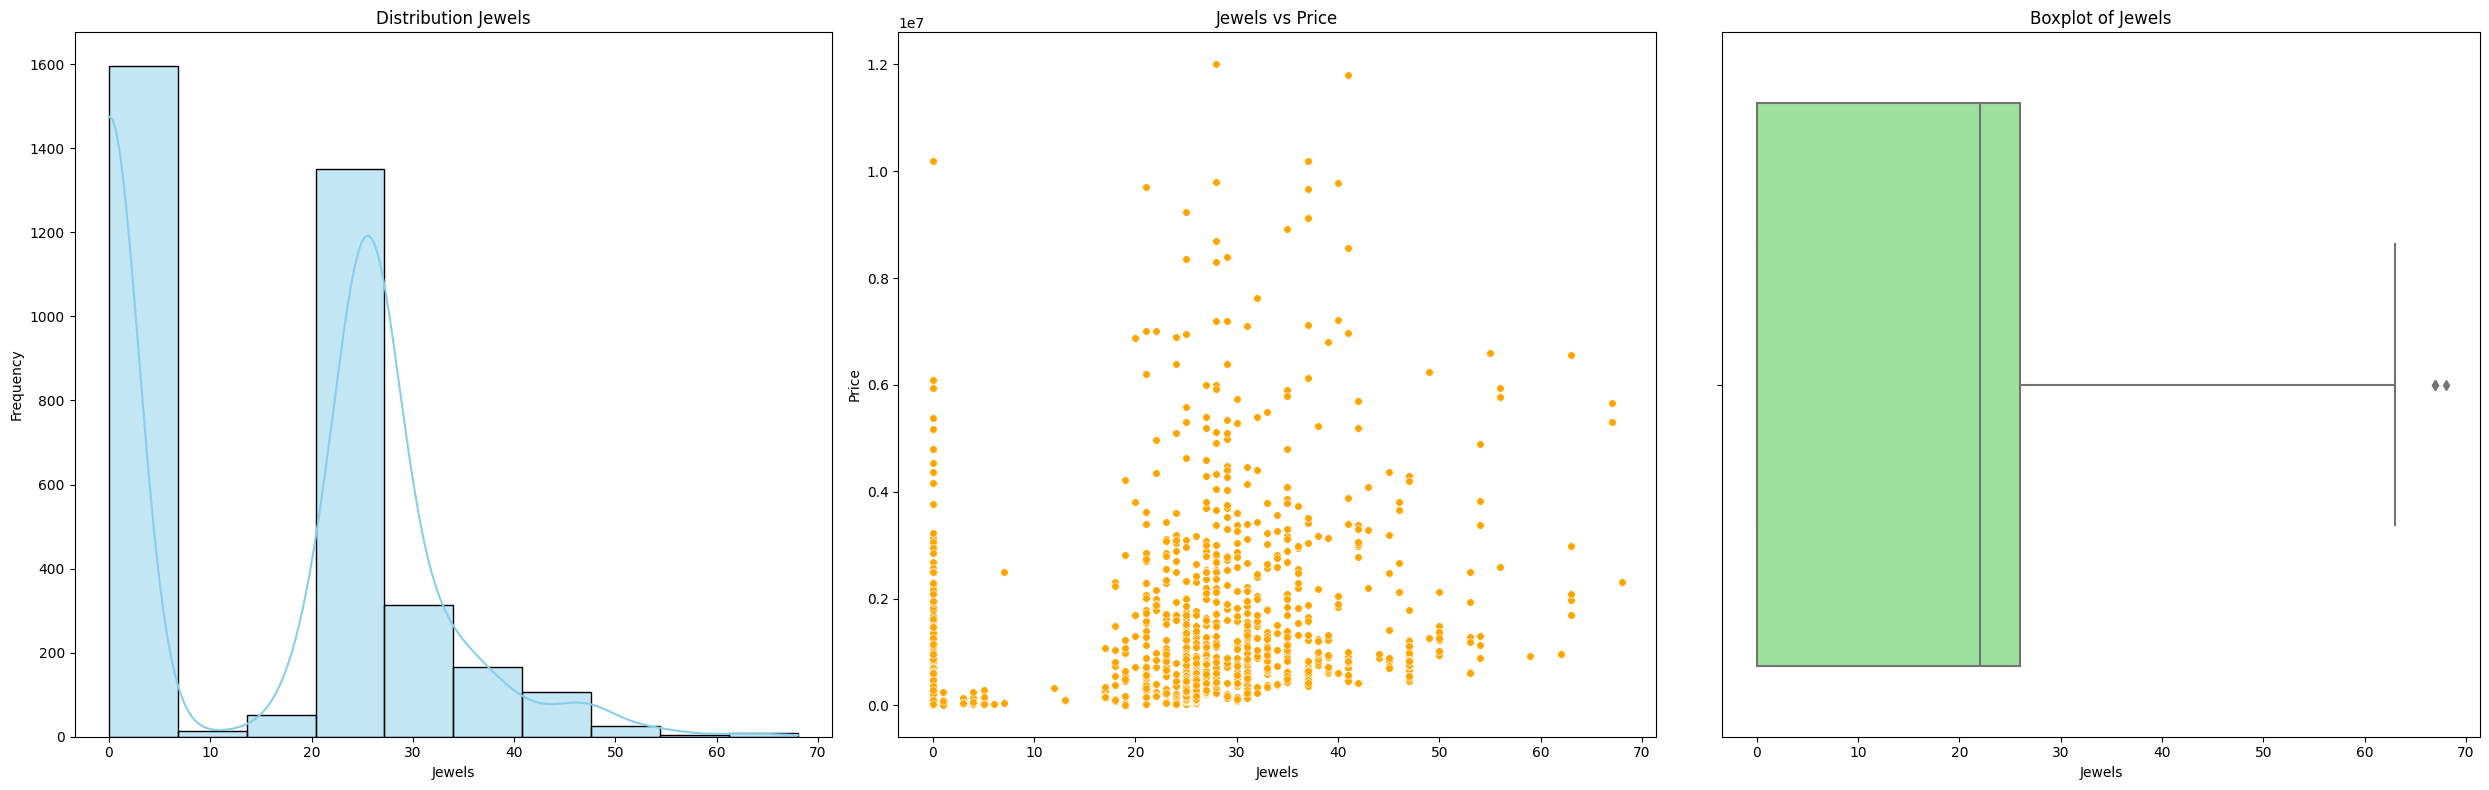

Pearson correlation: 0.34612209521555104


In [201]:
plot_numerical('Jewels')

In [204]:
coating_material_counts = df.groupby('Country of Origin')['Glass Material'].value_counts()
coating_material_counts.reset_index(name='Count')

,Country of Origin,Glass Material,Count
0,China,Mineral Crystal,113
1,China,Sapphire Crystal,31
2,China,Others,1
3,England,Sapphire Crystal,31
4,Germany,Sapphire Crystal,114
5,Germany,Mineral Crystal,77
6,Germany,Others,10
7,Japan,Sapphire Crystal,99
8,Japan,Hardlex Crystal,36
9,Japan,Others,1
